In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


[10, 14, 0, 180]

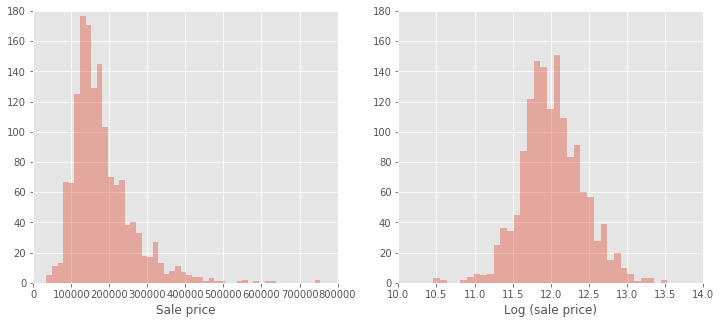

In [5]:
#Normalize Sales Price 
plt.figure(figsize=(12,5))
# f, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
plt.subplot(121)
sns.distplot(train['SalePrice'],kde=False)
plt.xlabel('Sale price')
plt.axis([0,800000,0,180])
plt.subplot(122)
sns.distplot(np.log(train['SalePrice']),kde=False)
plt.xlabel('Log (sale price)')
plt.axis([10,14,0,180])

In [6]:
#check correlations of numerical variables with Sale Price 
numerical = train.select_dtypes(include = [np.number])
corr = numerical.iloc[:,1:].corr()
corr['SalePrice'].sort_values(axis = 0, ascending = False).iloc[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

[ 7  6  8  5  9  4 10  3  1  2]


Text(0, 0.5, 'Sale Price')

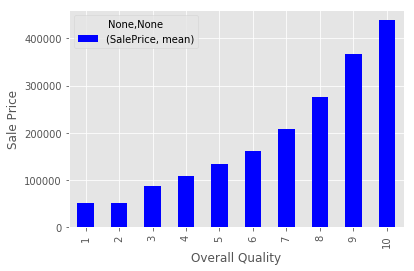

In [7]:
#Analyze/Visualize OverallQual
print(train.OverallQual.unique())
train.groupby('OverallQual').agg({'SalePrice':['mean']}).plot.bar(color = 'b')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Log (Sale Price)')

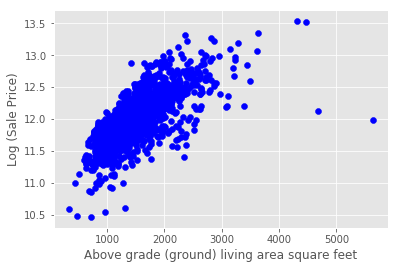

In [8]:
#Analyzing GrLivArea - Ground Living Area in sf
plt.scatter(train.GrLivArea, np.log(train.SalePrice), color = 'b')
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Log (Sale Price)')

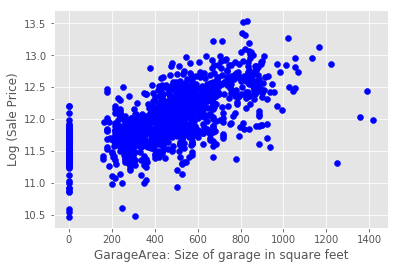

In [9]:
#Analyze Garage Area
plt.scatter(train.GarageArea, np.log(train.SalePrice), color = 'b')
plt.xlabel('GarageArea: Size of garage in square feet')
plt.ylabel('Log (Sale Price)')
#remove outliers
train = train[train['GarageArea']<1200]

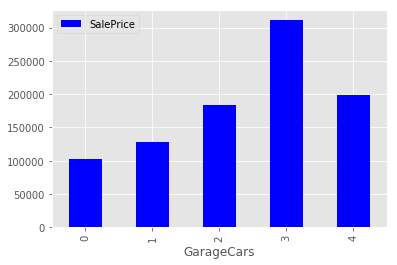

In [10]:
#Analyze Garage Cars
train.pivot_table(index = 'GarageCars', values = 'SalePrice').plot.bar(color = 'b')

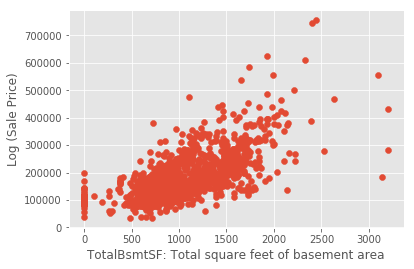

In [11]:
#Analyze total basement square footage
plt.scatter(train.TotalBsmtSF, train.SalePrice)
plt.xlabel('TotalBsmtSF: Total square feet of basement area')
plt.ylabel('Log (Sale Price)')
#remove outliers
train = train[train['TotalBsmtSF']<5000]



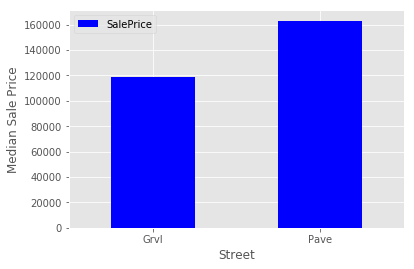

Pave    1450
Grvl       5
Name: Street, dtype: int64


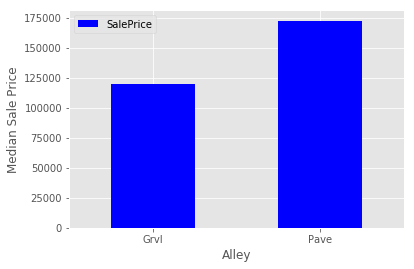

Grvl    50
Pave    41
Name: Alley, dtype: int64


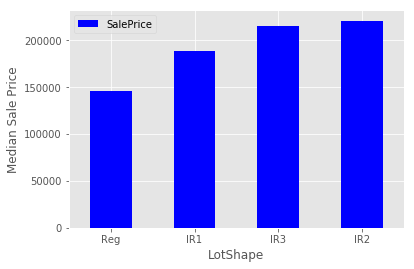

Reg    921
IR1    484
IR2     41
IR3      9
Name: LotShape, dtype: int64


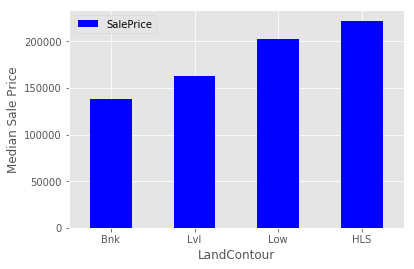

Lvl    1309
Bnk      62
HLS      50
Low      34
Name: LandContour, dtype: int64


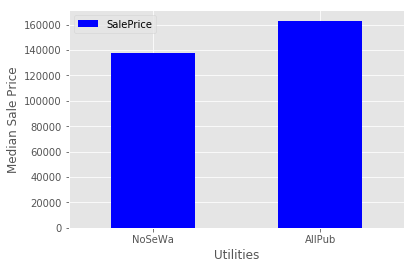

AllPub    1454
NoSeWa       1
Name: Utilities, dtype: int64


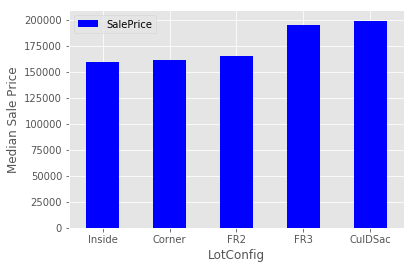

Inside     1048
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


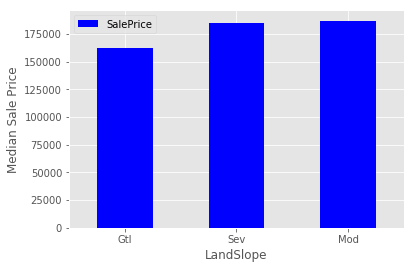

Gtl    1378
Mod      64
Sev      13
Name: LandSlope, dtype: int64


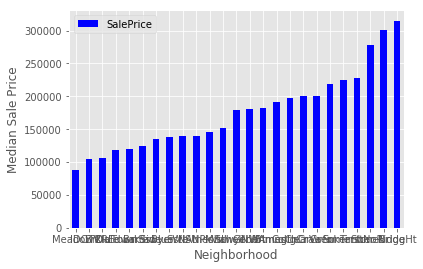

NAmes      225
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     75
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      38
IDOTRR      36
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


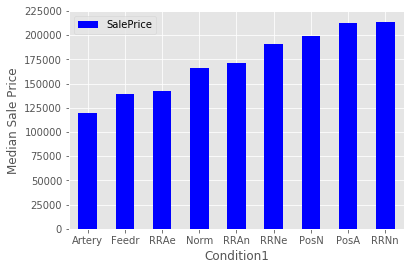

Norm      1257
Feedr       80
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64


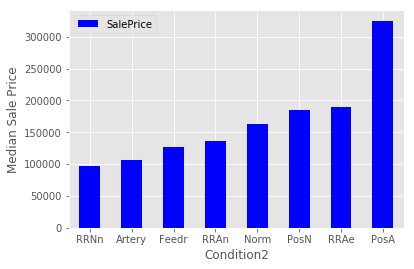

Norm      1441
Feedr        6
RRNn         2
Artery       2
PosN         1
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64


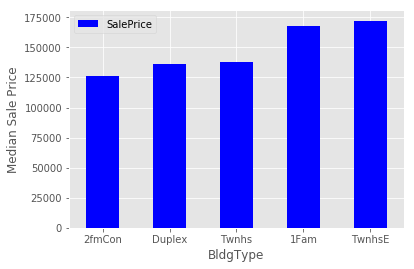

1Fam      1216
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      30
Name: BldgType, dtype: int64


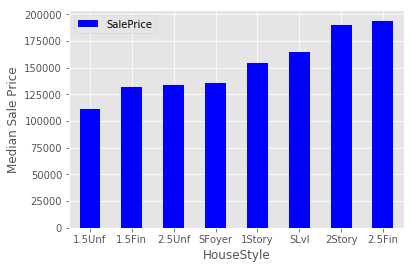

1Story    722
2Story    444
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


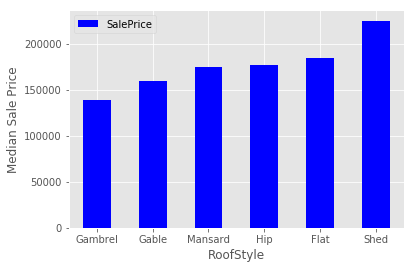

Gable      1139
Hip         283
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64


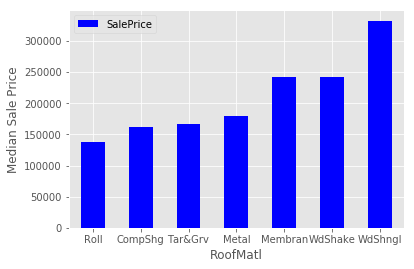

CompShg    1430
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64


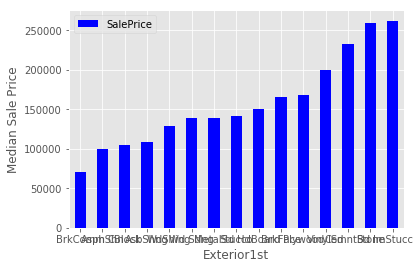

VinylSd    514
HdBoard    222
MetalSd    218
Wd Sdng    206
Plywood    108
CemntBd     60
BrkFace     50
WdShing     26
Stucco      24
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64


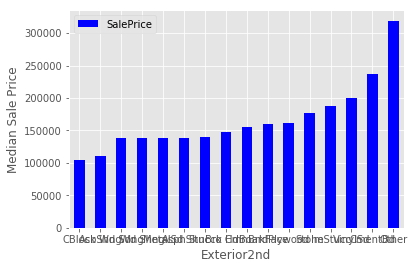

VinylSd    503
MetalSd    212
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     59
Wd Shng     38
Stucco      25
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64


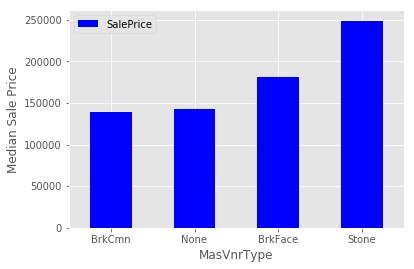

None       863
BrkFace    443
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64


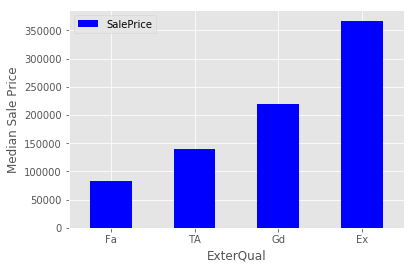

TA    905
Gd    488
Ex     49
Fa     13
Name: ExterQual, dtype: int64


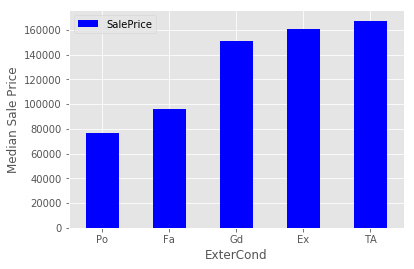

TA    1278
Gd     145
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64


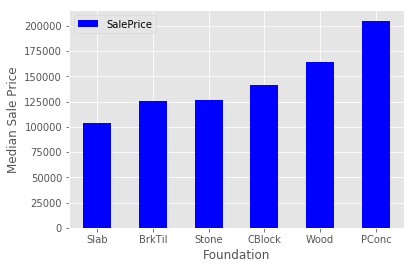

PConc     644
CBlock    632
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


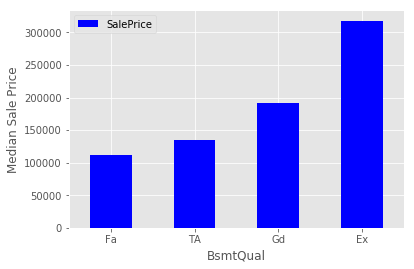

TA    647
Gd    618
Ex    118
Fa     35
Name: BsmtQual, dtype: int64


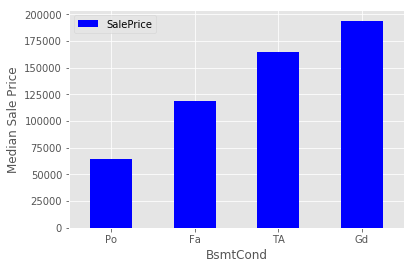

TA    1306
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64


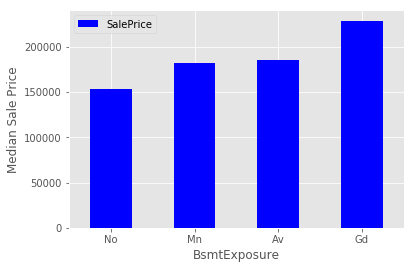

No    951
Av    219
Gd    133
Mn    114
Name: BsmtExposure, dtype: int64


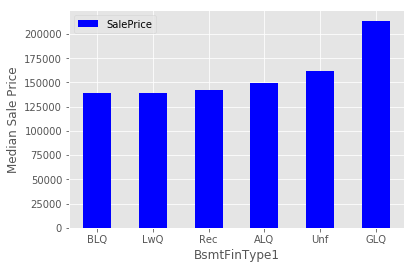

Unf    428
GLQ    416
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64


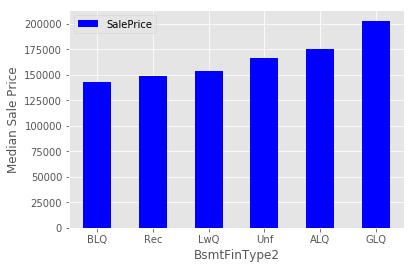

Unf    1251
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


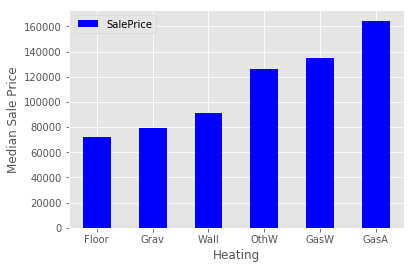

GasA     1423
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


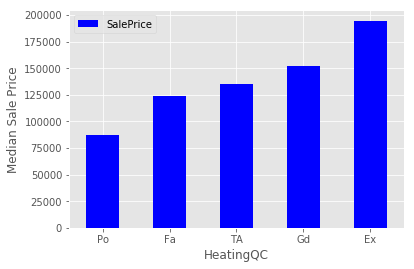

Ex    737
TA    427
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64


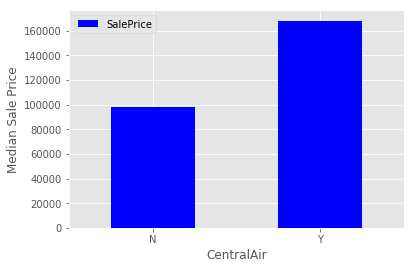

Y    1360
N      95
Name: CentralAir, dtype: int64


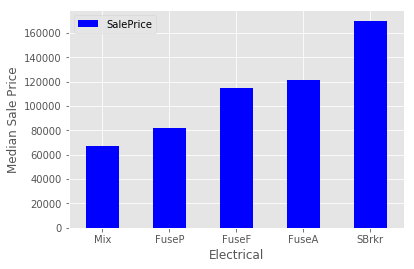

SBrkr    1329
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


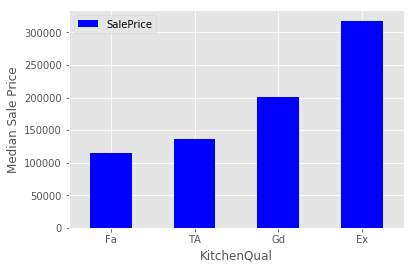

TA    733
Gd    586
Ex     97
Fa     39
Name: KitchenQual, dtype: int64


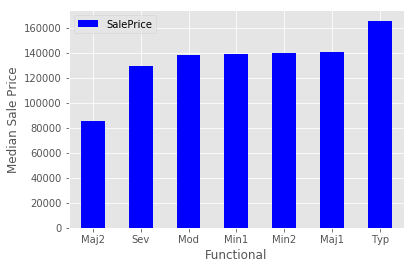

Typ     1355
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64


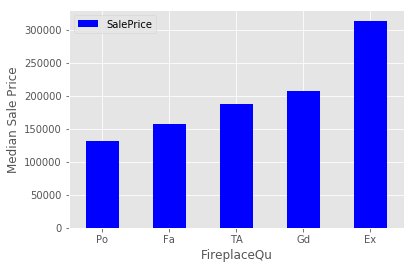

Gd    377
TA    312
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


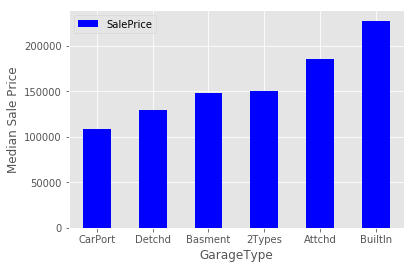

Attchd     867
Detchd     386
BuiltIn     88
Basment     19
CarPort      9
2Types       5
Name: GarageType, dtype: int64


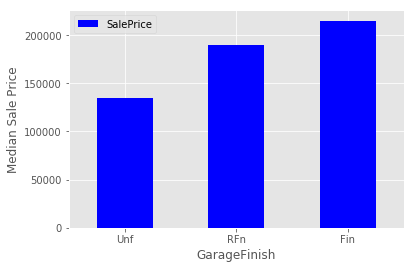

Unf    605
RFn    420
Fin    349
Name: GarageFinish, dtype: int64


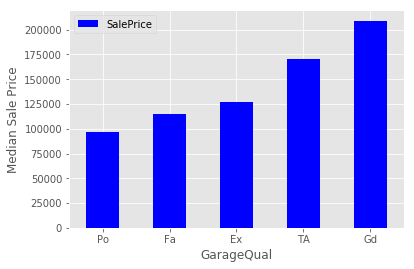

TA    1306
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64


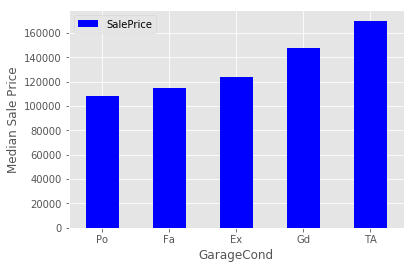

TA    1321
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


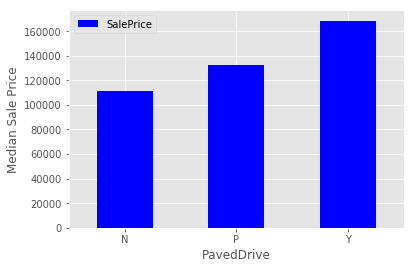

Y    1335
N      90
P      30
Name: PavedDrive, dtype: int64


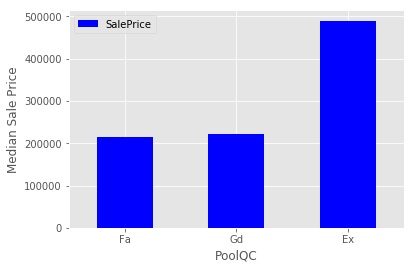

Fa    2
Ex    2
Gd    2
Name: PoolQC, dtype: int64


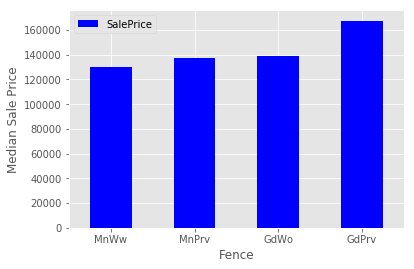

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


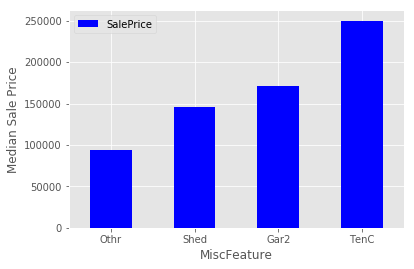

Shed    48
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64


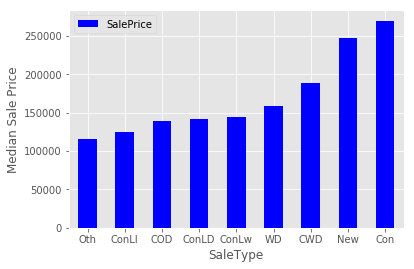

WD       1266
New       119
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


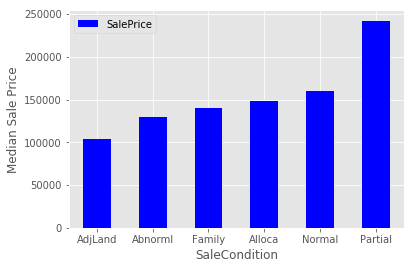

Normal     1196
Partial     122
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64


In [12]:
#Take a look at categorical variables and their counts
categorical = train.select_dtypes(exclude = [np.number])

for x in range(1,len(categorical.columns)):
    condition_pivot = train.pivot_table(index= categorical.columns[x], values= 'SalePrice', aggfunc= np.median).sort_values('SalePrice')
    condition_pivot.plot(kind= 'bar', color = 'blue')
    plt.xlabel(categorical.columns[x])
    plt.ylabel('Median Sale Price')
    plt.xticks(rotation = 0)
    plt.show()
    print(categorical[categorical.columns[x]].value_counts())

In [13]:
#Missing Data
def missing_data(df):
    miss = np.sum(df.isnull(),axis =0)
    miss = miss.loc[miss>0].sort_values(ascending = False)
    missmean = np.mean(df.isnull(),axis =0)
    missmean = missmean.loc[missmean>0].sort_values(ascending = False)
    return pd.concat([miss.rename('count'),missmean.rename('mean')],axis = 1)

missing_data(train)
#drop 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'

,count,mean
PoolQC,1449,0.995876
MiscFeature,1402,0.963574
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,689,0.473540
LotFrontage,258,0.177320
GarageYrBlt,81,0.055670
GarageType,81,0.055670
GarageFinish,81,0.055670
GarageQual,81,0.055670


In [14]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],1)
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],1)

In [15]:
#take a look at LotFrontage and try to impute with 1stFlrSF
train.corr()['LotFrontage'].sort_values(axis = 0, ascending = False)

LotFrontage      1.000000
1stFlrSF         0.411163
LotArea          0.392049
SalePrice        0.369805
GrLivArea        0.363461
TotRmsAbvGrd     0.340897
TotalBsmtSF      0.326645
GarageArea       0.316396
GarageCars       0.290900
BedroomAbvGr     0.278265
Fireplaces       0.247431
OverallQual      0.240460
FullBath         0.201652
MasVnrArea       0.165891
BsmtFinSF1       0.154086
BsmtUnfSF        0.138171
OpenPorchSF      0.127619
YearBuilt        0.118318
PoolArea         0.116614
WoodDeckSF       0.084663
YearRemodAdd     0.084151
BsmtFullBath     0.079863
2ndFlrSF         0.075575
3SsnPorch        0.074880
GarageYrBlt      0.059108
BsmtFinSF2       0.056007
ScreenPorch      0.046945
HalfBath         0.046422
LowQualFinSF     0.042046
MoSold           0.027568
EnclosedPorch    0.016083
YrSold           0.005097
MiscVal         -0.000036
KitchenAbvGr    -0.003439
BsmtHalfBath    -0.004536
Id              -0.024501
OverallCond     -0.053751
MSSubClass      -0.402701
Name: LotFro

In [16]:
#log train.LotArea & 1stFlrSF
# plt.hist(np.log(train.LotArea), bins = 500)
# plt.hist(np.log(train['1stFlrSF']), bins = 500)

#transforming X messed up linear regression..
# #log train.LotArea
# train.LotArea = np.log(train.LotArea)
# test.LotArea = np.log(test.LotArea)
# #log train.1stFlrSF
# train.LotArea = np.log(train['1stFlrSF'])
# test.LotArea = np.log(test['1stFlrSF'])

In [17]:
#impute lotfrontage with 1stFlrSF
retbins = pd.qcut(np.log(train['1stFlrSF']),5,retbins = True)[1]
firstfloorsf_cut = pd.cut(np.log(train['1stFlrSF']), retbins,labels = False)
combine = pd.concat([train, firstfloorsf_cut.rename('firstfloorsf')], axis = 1)
lot_dict = combine[~combine.LotFrontage.isnull()].groupby('firstfloorsf').agg({'LotFrontage':['median','count']}).to_dict()

In [18]:
def impute_lotfrontage(df):
    lot_cut = pd.cut(np.log(df['1stFlrSF']), retbins,labels = False)
    combine = pd.concat([df, lot_cut.rename('firstfloorsf')], axis = 1)
    impute_index = df.LotFrontage.isnull()
    combine.loc[impute_index, 'LotFrontage'] = combine[impute_index].apply(lambda x: lot_dict[('LotFrontage', 'median')]\
                                                                      [x['firstfloorsf']], axis =1)
    combine = combine.drop('firstfloorsf',axis =1)
    return combine

In [19]:
train = impute_lotfrontage(train)
test = impute_lotfrontage(test)

In [20]:
print(train.shape)
print(test.shape)

(1455, 76)
(1459, 75)


In [21]:
garage = [x for x in train.columns if 'Garage' in x]
garage = train[garage]
garage[garage.isnull().any(axis=1)]
#Looks like the missing values show no values because they have no garage, dummy_na.

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
99,NaN,NaN,NaN,0,0,NaN,NaN
108,NaN,NaN,NaN,0,0,NaN,NaN
125,NaN,NaN,NaN,0,0,NaN,NaN
127,NaN,NaN,NaN,0,0,NaN,NaN
140,NaN,NaN,NaN,0,0,NaN,NaN


In [22]:
#there are no cars with 0 GarageCars. Safe to assume missing values are due to having no garage.
garage[~garage.isnull().any(axis=1)].sort_values('GarageCars')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1459,Attchd,1965.0,Fin,1,276,TA,TA
1086,Attchd,1973.0,RFn,1,286,TA,TA
438,Detchd,1990.0,Unf,1,352,Gd,TA
437,Detchd,1926.0,Unf,1,180,TA,TA
1094,Attchd,1956.0,Fin,1,308,TA,TA
430,Detchd,1971.0,Unf,1,264,TA,TA
427,Detchd,1964.0,Unf,1,352,TA,TA
1098,Detchd,1936.0,Unf,1,240,TA,TA
425,Detchd,1947.0,Unf,1,240,TA,TA
424,Attchd,1956.0,RFn,1,297,TA,TA


In [23]:
train.corr()['GarageYrBlt'].sort_values(ascending = False)

GarageYrBlt      1.000000
YearBuilt        0.826356
YearRemodAdd     0.642836
GarageCars       0.590702
GarageArea       0.573513
OverallQual      0.548791
SalePrice        0.486758
FullBath         0.484469
TotalBsmtSF      0.326783
MasVnrArea       0.248674
1stFlrSF         0.230497
GrLivArea        0.229096
OpenPorchSF      0.226361
WoodDeckSF       0.225682
HalfBath         0.196277
BsmtUnfSF        0.188940
BsmtFinSF1       0.151050
TotRmsAbvGrd     0.145194
BsmtFullBath     0.123017
MSSubClass       0.087685
2ndFlrSF         0.071575
LotFrontage      0.052156
Fireplaces       0.043511
3SsnPorch        0.023940
MoSold           0.006223
Id              -0.001218
YrSold          -0.002189
PoolArea        -0.025699
LotArea         -0.030512
MiscVal         -0.032744
LowQualFinSF    -0.036120
BedroomAbvGr    -0.063541
ScreenPorch     -0.074730
BsmtHalfBath    -0.076873
BsmtFinSF2      -0.087306
KitchenAbvGr    -0.124051
EnclosedPorch   -0.296545
OverallCond     -0.323538
Name: Garage

In [24]:
train = train.drop('GarageYrBlt', 1)
test = test.drop('GarageYrBlt', 1)

In [25]:
print(train.shape)
print(test.shape)

(1455, 75)
(1459, 74)


In [26]:
#dummyna missing bsmt columns, fill BsmtFinType2 with 0
bsmt = [x for x in train.columns if 'Bsmt' in x]
bsmt = train[bsmt]
bsmt[bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [27]:
bsmt[~bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,1,0
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,0,1
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,0
3,TA,Gd,No,ALQ,216,Unf,0,540,756,1,0
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,0
5,Gd,TA,No,GLQ,732,Unf,0,64,796,1,0
6,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,1,0
7,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,1,0
8,TA,TA,No,Unf,0,Unf,0,952,952,0,0
9,TA,TA,No,GLQ,851,Unf,0,140,991,1,0


In [28]:
mas = [x for x in train.columns if 'Mas' in x]
mas = train[mas]
train[mas.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,65.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,BuiltIn,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,80.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,Attchd,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,Attchd,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,Attchd,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,Attchd,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,Ex,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,Attchd,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,Ex,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Attchd,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,Ex,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,0,3,2008,WD,Normal,237000


In [29]:
print(mas['MasVnrType'].value_counts())
print(mas['MasVnrArea'].value_counts())

None       863
BrkFace    443
Stone      126
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0       860
72.0        8
180.0       8
108.0       8
16.0        7
120.0       7
80.0        6
340.0       6
200.0       6
106.0       6
132.0       5
360.0       5
84.0        5
320.0       5
170.0       5
160.0       4
252.0       4
216.0       4
270.0       4
178.0       4
183.0       4
168.0       4
246.0       4
100.0       4
196.0       4
300.0       4
220.0       4
76.0        4
336.0       4
40.0        4
210.0       4
456.0       4
268.0       4
288.0       4
90.0        3
240.0       3
420.0       3
208.0       3
42.0        3
82.0        3
272.0       3
148.0       3
186.0       3
169.0       3
99.0        3
44.0        3
104.0       3
50.0        3
70.0        3
110.0       3
130.0       3
136.0       3
145.0       3
312.0       3
74.0        3
116.0       3
226.0       3
85.0        3
166.0       3
256.0       3
176.0       3
350.0       3
174.0       3
128.0       3
135.0       2

In [30]:
#fill na with most frequent which is 'None' for MasVnrType and '0' for MasVnrArea
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.mode()[0])
test.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.mode()[0])
train.MasVnrType = train.MasVnrType.fillna(train.MasVnrType.mode()[0])
test.MasVnrType = train.MasVnrType.fillna(train.MasVnrType.mode()[0])


In [31]:
np.sum(train.isnull(),axis =0).sort_values(ascending = False)

GarageQual       81
GarageType       81
GarageFinish     81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
Electrical        1
SalePrice         0
RoofStyle         0
RoofMatl          0
Exterior1st       0
MasVnrType        0
Exterior2nd       0
YearBuilt         0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
YearRemodAdd      0
HouseStyle        0
OverallCond       0
LandContour       0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
Utilities         0
OverallQual       0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
BsmtFinSF1        0
TotalBsmtSF       0
BsmtFinSF2        0
EnclosedPorch     0
Fireplaces        0
GarageCars        0
GarageArea        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
3SsnPorch         0


In [32]:
train = train.drop(train[train.Electrical.isnull()].index[0],0)

In [33]:
train.Electrical.isnull().any()

False

In [34]:
print(train.shape)
print(test.shape)

(1454, 75)
(1459, 74)


In [35]:
train_numerical = train.select_dtypes(include = [np.number])
train_categorical = train.select_dtypes(exclude = [np.number])
test_numerical = test.select_dtypes(include = [np.number])
test_categorical = test.select_dtypes(exclude = [np.number])

In [43]:
print(train_categorical.shape)
print(test_categorical.shape)

(1454, 38)
(1459, 38)


In [57]:
categorical_combined = pd.concat([train_categorical, test_categorical],axis =0)
categorical_dummy = pd.get_dummies(categorical_combined, dummy_na = True, drop_first = True)
train_categorical_dummy = categorical_dummy[:1454]
test_categorical_dummy =categorical_dummy[1454:]

In [58]:
categorical_dummy.shape

(2913, 233)

In [59]:
print(train_categorical_dummy.shape)
print(test_categorical_dummy.shape)

(1454, 233)
(1459, 233)


In [60]:
train = pd.concat([train_categorical_dummy, train_numerical],axis =1)
test = pd.concat([test_categorical_dummy, test_numerical], axis =1)

In [61]:
#check for missing values
sum(train.isnull().sum() != 0)

0

In [62]:
print(train.shape)
print(test.shape)

(1454, 270)
(1459, 269)


In [63]:
#create train and test sets
from sklearn.model_selection import train_test_split

X = train.drop(['SalePrice','Id'],axis = 1)
y = np.log(train['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size=0.2)

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [65]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

print('Train Set R-squared is: {}'.format(lm.score(X_train,y_train)))
print('Test Set R-squared is: {}'.format(lm.score(X_test,y_test)))

Train Set R-squared is: 0.9486497420773057
Test Set R-squared is: 0.9135657466792054


In [66]:
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, lm.predict(X_test))))

RMSE is 0.012218296425731153


RMSE is 0.012218296425731153


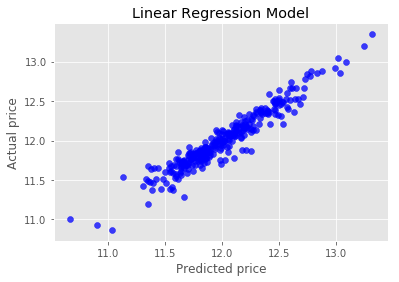

In [69]:
#predicting on the test set
predictions = lm.predict(X_test)
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

In [70]:
# HuberRegressor
from sklearn.linear_model import HuberRegressor
lm = HuberRegressor()
lm.fit(X_train, y_train)

print('Train Set R-squared is: {}'.format(lm.score(X_train,y_train)))
print('Test Set R-squared is: {}'.format(lm.score(X_test,y_test)))

Train Set R-squared is: 0.8143546130827973
Test Set R-squared is: 0.8528465149737988


In [71]:
from sklearn.metrics import mean_squared_error, accuracy_score
print('RMSE is {}'.format(mean_squared_error(y_test, lm.predict(X_test))))

RMSE is 0.02080153215943799


RMSE is 0.02080153215943799


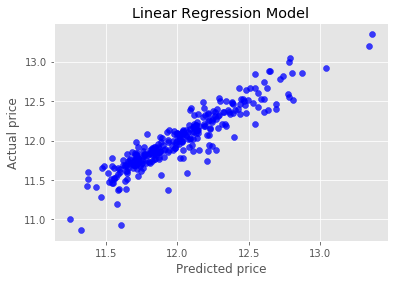

In [72]:
predictions = lm.predict(X_test)
print('RMSE is {}'.format(mean_squared_error(y_test, predictions)))

actual_values = y_test
plt.scatter(predictions, actual_values, alpha= 0.75, color = 'b')

plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.title('Linear Regression Model')
plt.show()

In [73]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05].sort_values('p value') #significant variables

C:\Users\mjdch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mjdch\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\mjdch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\mjdch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\mjdch\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
1,MSZoning_FV,5.148000e-01,6.100000e-02,8.408,0.000,3.950000e-01,6.350000e-01
249,GrLivArea,2.000000e-04,3.590000e-05,6.560,0.000,0.000000e+00,0.000000e+00
245,TotalBsmtSF,9.582000e-05,2.090000e-05,4.586,0.000,5.480000e-05,0.000000e+00
242,BsmtFinSF1,5.917000e-05,1.440000e-05,4.102,0.000,3.090000e-05,8.750000e-05
239,YearBuilt,1.900000e-03,0.000000e+00,4.758,0.000,1.000000e-03,3.000000e-03
238,OverallCond,3.950000e-02,5.000000e-03,8.554,0.000,3.000000e-02,4.900000e-02
237,OverallQual,3.880000e-02,5.000000e-03,7.388,0.000,2.800000e-02,4.900000e-02
236,LotArea,2.862000e-06,5.720000e-07,5.006,0.000,1.740000e-06,3.980000e-06
231,SaleCondition_Normal,6.710000e-02,1.500000e-02,4.531,0.000,3.800000e-02,9.600000e-02
218,PavedDrive_nan,-3.056000e-16,4.400000e-17,-6.945,0.000,-3.920000e-16,-2.190000e-16


In [74]:
#insignificant variables
table[table['p value']>0.05].sort_values('p value')

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
80,HouseStyle_nan,-1.181000e-14,6.080000e-15,-1.944,0.052,-2.370000e-14,1.120000e-16
255,KitchenAbvGr,-6.180000e-02,3.200000e-02,-1.927,0.054,-1.250000e-01,1.000000e-03
124,Exterior2nd_nan,8.911000e-16,4.640000e-16,1.921,0.055,-1.950000e-17,1.800000e-15
51,Condition1_Feedr,5.000000e-02,2.600000e-02,1.923,0.055,-1.000000e-03,1.010000e-01
169,Heating_GasW,2.375000e-01,1.240000e-01,1.916,0.056,-6.000000e-03,4.810000e-01
172,Heating_Wall,2.690000e-01,1.410000e-01,1.907,0.057,-8.000000e-03,5.460000e-01
213,GarageCond_Po,1.971500e+00,1.035000e+00,1.906,0.057,-5.900000e-02,4.002000e+00
50,Neighborhood_nan,2.021000e-14,1.070000e-14,1.883,0.060,-8.550000e-16,4.130000e-14
139,Foundation_PConc,3.330000e-02,1.800000e-02,1.877,0.061,-2.000000e-03,6.800000e-02
125,MasVnrType_BrkFace,6.500000e-02,3.500000e-02,1.855,0.064,-4.000000e-03,1.340000e-01


In [75]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train_scaled)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05].sort_values('p value')

#how do you input column names for x63 etc?

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,1.202530e+01,3.000000e-03,4011.931,0.000,1.201900e+01,1.203100e+01
249,x249,7.200000e-02,6.000000e-03,11.366,0.000,6.000000e-02,8.400000e-02
247,x247,4.840000e-02,9.000000e-03,5.494,0.000,3.100000e-02,6.600000e-02
246,x246,4.060000e-02,9.000000e-03,4.681,0.000,2.400000e-02,5.800000e-02
245,x245,3.750000e-02,7.000000e-03,5.035,0.000,2.300000e-02,5.200000e-02
242,x242,2.850000e-02,5.000000e-03,5.500,0.000,1.800000e-02,3.900000e-02
239,x239,5.730000e-02,1.200000e-02,4.758,0.000,3.400000e-02,8.100000e-02
238,x238,4.340000e-02,5.000000e-03,8.554,0.000,3.300000e-02,5.300000e-02
237,x237,5.420000e-02,7.000000e-03,7.388,0.000,4.000000e-02,6.900000e-02
236,x236,2.810000e-02,6.000000e-03,5.006,0.000,1.700000e-02,3.900000e-02


In [76]:
#Ridge, Lasso, ElasticNet Regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [52]:
ridge.set_params(normalize=False)
lasso.set_params(normalize=False)
net.set_params(normalize=False)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test = []
net_scores_train  = []
net_scores_test  = []
net_scores_test  = []

alphas = np.linspace(0.01, 100, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            net.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            net.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            net_scores_train.append(net.score(X_test, y_test))
            net_scores_test.append(net.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)
net_scores_train = np.array(net_scores_train) 
net_scores_test  = np.array(net_scores_test)

Text(0, 0.5, '$R^2$')

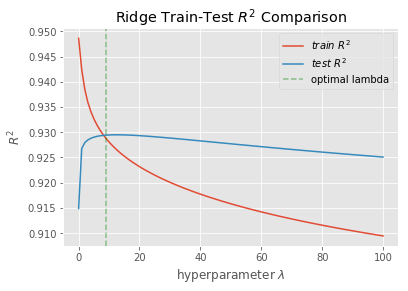

In [53]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

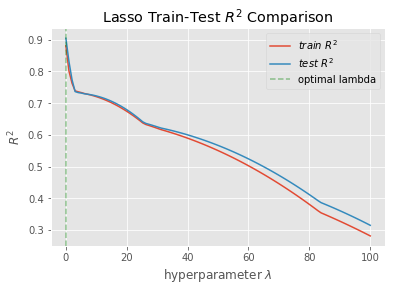

In [54]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.min(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

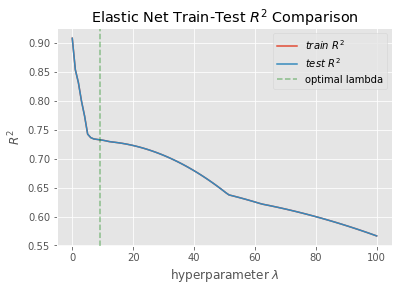

In [55]:
plt.plot(alphas, net_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, net_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Elastic Net Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.min(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
#Ridge GridSearch
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'normalize' : [True,False], 'random_state':[1]}
grid = GridSearchCV(ridge, params, scoring = 'r2', cv= 10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('Train R^2 Score:{}'.format(grid.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(grid.score(X_test,y_test)))

# Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
#    normalize=False, random_state=1, solver='auto', tol=0.001)
# Train R^2 Score:0.9280655943422117
# Test R^2 Score:0.9294635405152998

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)
Train R^2 Score:0.9280655943422117
Test R^2 Score:0.9294635405152998


In [58]:
#Lasso GridSearch
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],'normalize' : [True,False], 'random_state':[1]}
grid = GridSearchCV(lasso, params, scoring = 'r2', cv= 10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('Train R^2 Score:{}'.format(grid.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(grid.score(X_test,y_test)))

# Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=True, positive=False, precompute=False, random_state=1,
#    selection='cyclic', tol=0.0001, warm_start=False)
# Train R^2 Score:0.9317768616993676
# Test R^2 Score:0.9280605964215372

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)
Train R^2 Score:0.9317768616993676
Test R^2 Score:0.9280605964215372


In [59]:
#Elastic Net GridSearch
params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],\
          "l1_ratio": np.arange(0.0, 1.0, 0.1), 'normalize' : [True,False]}
grid = GridSearchCV(net, params, scoring = 'r2', cv= 10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('Train R^2 Score:{}'.format(grid.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(grid.score(X_test,y_test)))


# ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
#       max_iter=1000, normalize=True, positive=False, precompute=False,
#       random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
# Train R^2 Score:0.9329568667137177
# Test R^2 Score:0.9294633291182789

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Train R^2 Score:0.9329568667137177
Test R^2 Score:0.9294633291182789


In [60]:
#Gradient Boost Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbmr = GradientBoostingRegressor()
gbmr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
print('Train R^2 Score:{}'.format(gbmr.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(gbmr.score(X_test,y_test)))

Train R^2 Score:0.9596613209065609
Test R^2 Score:0.9098213441819846


In [62]:
y_train_predict = gbmr.predict(X_train)
y_test_predict = gbmr.predict(X_test)
gbmr_train = mean_squared_error(y_train, y_train_predict)
print('Mean square error on the Train set is: {}'.format(gbmr_train))
gbmr_test = mean_squared_error(y_test, y_test_predict)
print('Mean square error on the Test set is: {}'.format(gbmr_test))

Mean square error on the Train set is: 0.006598915151225128
Mean square error on the Test set is: 0.012747603012999237


In [63]:
params = {"n_estimators": np.arange(1,1001,100),\
          "max_depth": [5,10,25,100], 'learning_rate' : [0.1,0.5,1], 'subsample' : [0.5,0.75,1]}
grid = GridSearchCV(gbmr, params, scoring = 'r2', cv= 10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('Train R^2 Score:{}'.format(grid.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(grid.score(X_test,y_test)))

# GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
#              learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
#              max_leaf_nodes=None, min_impurity_decrease=0.0,
#              min_impurity_split=None, min_samples_leaf=1,
#              min_samples_split=2, min_weight_fraction_leaf=0.0,
#              n_estimators=201, n_iter_no_change=None, presort='auto',
#              random_state=None, subsample=0.75, tol=0.0001,
#              validation_fraction=0.1, verbose=0, warm_start=False)
# Train R^2 Score:0.9973518094409025
# Test R^2 Score:0.9101422134241378

C:\Users\mjdch\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=201, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.75, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Train R^2 Score:0.9973518094409025
Test R^2 Score:0.9101422134241378


In [64]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 700, n_jobs = -1, max_depth = 25)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
print('Train R^2 Score:{}'.format(rf.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(rf.score(X_test,y_test)))

Train R^2 Score:0.9819534127916083
Test R^2 Score:0.8859670977142359


In [66]:
y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)

est_train = mean_squared_error(y_train, y_train_predict)
print('Mean square error on the Train set is: {}'.format(est_train))

est_test = mean_squared_error(y_test, y_test_predict)
print('Mean square error on the Test set is: {}'.format(est_test))

Mean square error on the Train set is: 0.002952201223086915
Mean square error on the Test set is: 0.016119625598462875


In [67]:
#Feature Importance of Random Forest Regressor
sorted_importance = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('OverallQual', 0.5641451348263895),
 ('GrLivArea', 0.1026178884095219),
 ('TotalBsmtSF', 0.04651306119587731),
 ('GarageArea', 0.0423756466921311),
 ('GarageCars', 0.032095715567181084),
 ('1stFlrSF', 0.026128061226365944),
 ('BsmtFinSF1', 0.021577586294459727),
 ('LotArea', 0.014369073502110424),
 ('YearBuilt', 0.014015295842155563),
 ('OverallCond', 0.011255154378606634),
 ('YearRemodAdd', 0.009196091797866427),
 ('2ndFlrSF', 0.006215125858139021),
 ('LotFrontage', 0.006156804641480404),
 ('CentralAir_Y', 0.005821055920017597),
 ('BsmtUnfSF', 0.005491732484442388),
 ('OpenPorchSF', 0.004549826574344634),
 ('MoSold', 0.0037266899177655485),
 ('Fireplaces', 0.0033858597049882164),
 ('MSZoning_RM', 0.0030836493557246498),
 ('WoodDeckSF', 0.0029626411924931232),
 ('GarageType_Attchd', 0.002883380743851443),
 ('MasVnrArea', 0.0027717316223566687),
 ('TotRmsAbvGrd', 0.0023898433204847837),
 ('BsmtQual_Gd', 0.0023270812566482464),
 ('LotShape_Reg', 0.0022791440696282093),
 ('GarageQual_TA

In [68]:
#Random Forest Regressor Grid Search
params = {"n_estimators": np.arange(1,800,100),"max_depth": [5,10,25,50]}
grid = GridSearchCV(rf, params, scoring = 'r2', cv= 10)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
print('Train R^2 Score:{}'.format(grid.score(X_train,y_train)))
print('Test R^2 Score:{}'.format(grid.score(X_test,y_test)))


# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=-1,
#            oob_score=False, random_state=None, verbose=0, warm_start=False)
# Train R^2 Score:0.9806402416920308
# Test R^2 Score:0.8839553886336102

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Train R^2 Score:0.9806402416920308
Test R^2 Score:0.8839553886336102


                Train R^2  Test R^2
Ridge            0.928066  0.929464
Elastic-Net      0.932957  0.929463
Lasso            0.931777  0.928061
Linear           0.948650  0.913566
Gradient Boost   0.997352  0.910142
Random Forest    0.980640  0.883955
Huber            0.814355  0.852847


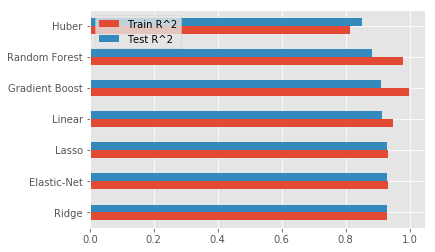

In [86]:
import matplotlib.pyplot as plt
TrainR2 = [0.9486497420773057,0.8143546130827973,0.9280655943422117, 0.9317768616993676, 0.9329568667137177, 0.9973518094409025, 0.9806402416920308 ]
TestR2 = [0.9135657466792054,0.8528465149737988, 0.9294635405152998, 0.9280605964215372, 0.9294633291182789, 0.9101422134241378, 0.8839553886336102 ]

index = ['Linear','Huber', 'Ridge','Lasso','Elastic-Net', 'Gradient Boost','Random Forest']
df = pd.DataFrame({'Train R^2': TrainR2, 'Test R^2': TestR2}, index = index).sort_values(by = 'Test R^2', ascending = False)
print(df)
ax = df.plot.barh().legend(loc = 'upper left')



In [77]:
# Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
#    normalize=False, random_state=1, solver='auto', tol=0.001)


ridge.set_params(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)
ridge.fit(X_train,y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)

In [78]:
missing_data(test)

,count,mean
MasVnrArea,5,0.003427
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
GarageArea,1,0.000685
GarageCars,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
BsmtFinSF1,1,0.000685


In [79]:
submission =pd.DataFrame()
submission['Id'] = test.Id
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = ridge.predict(feats)
final_predictions = np.exp(predictions)

In [80]:
test.shape

(1459, 269)

In [81]:
final_predictions

array([117901.44124922, 153221.85892023, 178426.62614478, ...,
       174974.97267213, 111168.48885445, 223979.27556841])

In [82]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,117901.441249
1,1462,153221.858920
2,1463,178426.626145
3,1464,198195.815813
4,1465,194615.462770


In [83]:
submission.to_csv('submission1.csv', index=False)